In [1]:
import tensorflow as tf
import json
import nltk
import random
from random import shuffle
import numpy as np
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [4]:
with open('intents.json') as data:
    intents = json.load(data)

In [5]:
words = []
documents = {}
ignore = [".", "?","!",","]
for intent in intents['intents']:
    for pattern in intent['patterns']:
        tokens = nltk.word_tokenize(pattern)
        token_words = [lemmatizer.lemmatize(w.lower()) for w in tokens if w not in ignore]
        if (intent['tag'] not in list(documents.keys())):
            documents[intent['tag']] = [token_words]
        else:
            documents[intent['tag']].append(token_words)
        words.extend(token_words)
tags = list(documents.keys())
words = np.sort(np.unique(words))

In [6]:
print(f"Tags: {tags}, Length:{len(tags)}")
print("-"*125)
print(f"Words: {words}, Length: {len(words)}")
print("-"*125)
for key, value in documents.items():
    print(f"{key}: {value}\n")

Tags: ['greeting', 'goodbye', 'thanks', 'name', 'gaming', 'audio', 'display', 'computer', 'phone'], Length:9
-----------------------------------------------------------------------------------------------------------------------------
Words: ['a' 'accessory' 'address' 'adios' 'am' 'any' 'are' 'best' 'business'
 'buy' 'bye' 'call' 'can' 'computer' 'do' 'earphone' 'for' 'gamer'
 'gamers' 'gaming' 'get' 'good' 'goodbye' 'have' 'hd' 'headphone'
 'headset' 'hello' 'help' 'hey' 'hi' 'hobby' 'how' 'i' 'is' 'laptop'
 'later' 'like' 'looking' 'me' 'mobile' 'mobilephone' 'monitor' 'much'
 'my' 'name' 'need' 'party' 'personal' 'phone' 'place' 'product'
 'purchase' 'recommendation' 'see' 'select' 'should' 'show' 'smartphone'
 'some' 'speaker' 'television' 'tell' 'thank' 'thanks' 'the' 'to' 'tv'
 'ultra' 'up' 'very' 'want' 'what' 'where' 'who' 'you' 'your'], Length: 77
-----------------------------------------------------------------------------------------------------------------------------
greet

In [7]:
def get_label(category):
    label = np.zeros((len(tags),), dtype=int)
    for t in tags:
        if (t == category):
            label[tags.index(category)] = 1
            return label
        
def gen_data(filename = None):
    data = []
    for tag, patterns in documents.items():
        label = get_label(tag)
        for pattern in patterns:
            bag = []
            for w in words:
                if w in pattern:
                    bag.append(1)
                else:
                    bag.append(0)
        data.append([np.array(bag), label])
    shuffle(data)
    if filename is not None:
        np.save(filename+'.npy', data)
    return np.array(data)

In [8]:
training_data=gen_data()
#training_data.shape

C:\Users\vighn\anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [9]:
train_x = np.array([i[0] for i in training_data])
train_y = np.array([i[1] for i in training_data])

In [10]:
train_x.shape[1:]

(77,)

In [11]:
model = Sequential()
model.add(Dense(32, input_shape=train_x.shape[1:], activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(tags), activation='softmax'))

In [12]:
model = Sequential()
model.add(Dense(128, input_shape=train_x.shape[1:], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(tags), activation='softmax'))

In [13]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
#checkpoint = ModelCheckpoint('./models/model-{epoch:03d}.model', monitor='loss', verbose=0, save_best_only = True,
                             #mode = 'auto')
history = model.fit(train_x, train_y, epochs = 40, batch_size=10, verbose=1)

Epoch 1/40
1/1 [==============================] - 0s 317ms/step - loss: 2.1881 - accuracy: 0.1111
Epoch 2/40
1/1 [==============================] - 0s 0s/step - loss: 2.3405 - accuracy: 0.1111
Epoch 3/40
1/1 [==============================] - 0s 0s/step - loss: 2.3313 - accuracy: 0.2222
Epoch 4/40
1/1 [==============================] - 0s 0s/step - loss: 2.2652 - accuracy: 0.0000e+00
Epoch 5/40
1/1 [==============================] - 0s 0s/step - loss: 2.1946 - accuracy: 0.1111
Epoch 6/40
1/1 [==============================] - 0s 0s/step - loss: 2.1427 - accuracy: 0.2222
Epoch 7/40
1/1 [==============================] - 0s 0s/step - loss: 2.2421 - accuracy: 0.2222
Epoch 8/40
1/1 [==============================] - 0s 16ms/step - loss: 2.1653 - accuracy: 0.1111
Epoch 9/40
1/1 [==============================] - 0s 0s/step - loss: 2.1230 - accuracy: 0.2222
Epoch 10/40
1/1 [==============================] - 0s 0s/step - loss: 2.1534 - accuracy: 0.3333
Epoch 11/40
1/1 [=======================

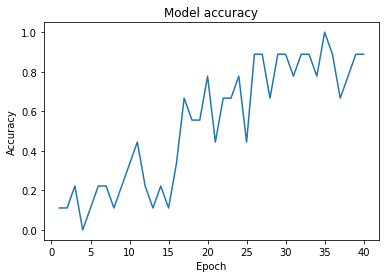

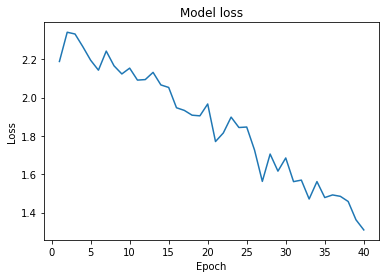

In [15]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()
plot_learningCurve(history, 40)

In [16]:
model.save('model.h5')

In [17]:
pickle.dump({'words':words, 'tags':tags, 'train_x':train_x, 'train_y':train_y}, open("training_data", "wb"))

In [18]:
data = pickle.load(open("training_data", "rb"))
words = data['words']
tags = data['tags']
train_x = data['train_x']
train_y = data['train_y']

In [19]:
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')

In [21]:
def sentence_cleanup(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bag_of_words(sentence, words, show_details=False):
    sentence_words = sentence_cleanup(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w==s:
                bag[i]=1
                if show_details:
                    print('Found in bag: %s' %w)
    return (np.array(bag))                

In [22]:
def classify(sentence):
    bag = bag_of_words(sentence, words)
    results = model.predict(bag.reshape(-1, len(words)))
    return np.argmax(results)

def response(sentence, userID='123', show_details=False):
    predicted_class=classify(sentence)
    predicted_tag = tags[predicted_class]
    for i in intents['intents']:
      if i['tag']==predicted_tag:
        return print(random.choice(i['responses']))

In [23]:
# Delete this
bag1 = bag_of_words("Hey", words)
bag2 = bag_of_words("earpods", words)
results1 = model.predict(bag1.reshape(-1, len(words)))
results2 = model.predict(bag2.reshape(-1, len(words)))
print(bag1, bag2)
print(results1, results2)
print(tags)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[[0.09872789 0.11569285 0.10662109 0.11287647 0.10490734 0.11698554
  0.0939532  0.12462038 0.12561518]] [[0.11552922 0.11237324 0.10164158 0.11712311 0.10887147 0.10543771
  0.10368533 0.11190481 0.12343346]]
['greeting', 'goodbye', 'thanks', 'name', 'gaming', 'audio', 'display', 'computer', 'phone']


In [24]:
tags[classify('I want to buy earphones')]

'display'

In [25]:
response('I like gaming')

https://www.sony.com/en-ae/electronics/headphones/t/headband-headphones


In [26]:
response('I want to buy a hd television')

https://uae.sharafdg.com/?q=monitors&post_type=product


In [27]:
response('I want to buy speakers')

4K television is good for a family setting


In [28]:
response('bye')

My name is Chadbot


In [29]:
response('who are you')

https://www.jumbo.ae/computers/laptops
